In [3]:
# tokenizer.py
# 6.2 用标记解析方法预处理数据  练习
# NLP 自然语言处理
testfile = open("twenty.txt", "r")
text = testfile.read()
#print(text)
"""
from nltk.tokenize import sent_tokenize
# 对输入文本运行nltk提供的句子解析器,提取标记.
sent_tokenize_list = sent_tokenize(text)

print ("\nSentence tokenizer:") # 打印解析结果列表
print (sent_tokenize_list)

# Create a new word tokenizer # 建立一个新的单词解析器
from nltk.tokenize import word_tokenize # 单词分词

print ("\nWord tokenizer:")
print (word_tokenize(text))
"""
# Create a new WordPunct tokenizer 带标点的单词解析器
# 将标点符号保留到不同的句子中
from nltk.tokenize import WordPunctTokenizer

word_punct_tokenizer = WordPunctTokenizer()
print ("\nWord punct tokenizer:")
print (word_punct_tokenizer.tokenize(text))

# stemmer.py
# 6.3 提取文本数据的词干
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
#定义单词作词干提取
words = ['table', 'probably', 'wolves', 'playing', 'is', 
        'dog', 'the', 'beaches', 'grounded', 'dreamt', 'envision']
# 词干提取表，对比不同的词干提取算法
# Compare different stemmers
stemmers = ['PORTER', 'LANCASTER', 'SNOWBALL']
stemmer_porter = PorterStemmer()
stemmer_lancaster = LancasterStemmer()
stemmer_snowball = SnowballStemmer('english')
# 打印格式
formatted_row = '{:>16}' * (len(stemmers) + 1)
print ('\n', formatted_row.format('WORD', *stemmers), '\n')
# 迭代列表中的单词，用3个提取器提取
for word in words:
    stemmed_words = [stemmer_porter.stem(word), 
            stemmer_lancaster.stem(word), stemmer_snowball.stem(word)]
    print (formatted_row.format(word, *stemmed_words))


Word punct tokenizer:
['From', ':', 'geb', '@', 'cs', '.', 'pitt', '.', 'edu', '(', 'Gordon', 'Banks', ')', 'Subject', ':', 'Re', ':', 'Striato', 'Nigral', 'Degeneration', 'Reply', '-', 'To', ':', 'geb', '@', 'cs', '.', 'pitt', '.', 'edu', '(', 'Gordon', 'Banks', ')', 'Organization', ':', 'Univ', '.', 'of', 'Pittsburgh', 'Computer', 'Science', 'Lines', ':', '16', 'In', 'article', '<', '9303252134', '.', 'AA09923', '@', 'walrus', '.', 'mvhs', '.', 'edu', '>', 'ktodd', '@', 'walrus', '.', 'mvhs', '.', 'edu', '((', 'Ken', 'Todd', '))', 'writes', ':', '>', 'I', 'would', 'like', 'any', 'information', 'available', 'on', 'this', 'rare', 'disease', '.', 'I', 'understand', '>', 'that', 'an', 'operation', 'referred', 'to', 'as', 'POLLIDOTOMY', 'may', 'be', 'in', 'order', '.', 'Does', 'anyone', '>', 'know', 'of', 'a', 'physician', 'that', 'performs', 'this', 'procedure', '.', 'All', 'responses', 'will', 'be', '>', 'appreciated', '.', 'Please', 'respond', 'via', 'email', 'to', 'ktodd', '@', 'walr

In [1]:
# 制作用户数据的文本文件
# 存放在folder\下的2个文件夹里（category_1和category_2），分成2类.
# 直接copy显示文本保存为.txt类即可。
from sklearn import datasets
data_folder = 'c:\\users\\user\\MachineLearning\\folder\\'
"""
from sklearn import datasets
help(datasets) :
load_files(container_path, description=None, categories=None, 
           load_content=True, shuffle=True, encoding=None,
           decode_error='strict', random_state=0)
"""
mydescr = "My study machine learning's test loading data file. YeShuping  2019.3.2 '\n'\
have 2 pieces from AOL.com, 2 pieces from Python.org, divide into 2 categories.\n"

rawData = datasets.load_files(data_folder, description=mydescr, encoding="utf-8" )
# 不指定encoding,默认是None,读入文档是二进制格式，字符串前加了个d，读不进来。
print( rawData.DESCR)
X = rawData.data
# print (X[0]) #first file content
y = rawData.target # 显示文件的分类
# print (y) # [ 1 1 0 0 ] 4篇 2 类
# print(len(X)) # 4 篇文章 X[0],X[1],X[2],X[3]
# print(X[0], '\n') # 第一篇

# 词分割
import nltk
from nltk.tokenize import word_tokenize
nltk_tokens = word_tokenize(X[0]) # 第一篇的词分割
# print('nltk tokens : ',nltk_tokens,'\n')

from sklearn.feature_extraction.text import CountVectorizer
# 初始化对象CountVectorizer
count_vect = CountVectorizer()
# 调用算法计算每个文档中单词出现的次数，为每个文档创建特征向量
word_count = count_vect.fit_transform(rawData.data)
# 查询矩阵大小。
print('文章篇数 单词数\n',word_count.shape,'\n') # (4, 433) 4篇文章里有433个单词

# 注意：因为每篇文档都使用有限的单词集合，输出矩阵是稀疏矩阵（每行非零元素非常少，存储所有冗余的零没有意义），
# 输出矩阵维数(1187,25638).
# 第一个值表示数据集中的观测样本数(文档数)，第二个值是特征数（数据集中的单词数）。
# 经过CountVectorizer转换，每篇文档都与其特征向量相关。

# 看第一篇文档：
# print(word_count[0])
# 输出的是一个只有非零元素的稀疏矩阵。

# 查看单词与出现次数的直接对应表
print('单词与出现次数的对应表')
word_list= count_vect.get_feature_names()
for n in word_count[0].indices:
    print('word "%s" appears %i times' % (word_list[n], word_count[0, n]))
print('-'*50,'\n')

# 计算词频，判断是停止词还是少见词 参见数据菜谱第6章
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vect = TfidfVectorizer(use_idf=False, norm='l1') # l1:范数，频率综合近于1.希望增大罕见词与常见词的差别，
# 
word_freq = tf_vect.fit_transform(rawData.data)
word_list = tf_vect.get_feature_names()
print('词  频  表')
for n in word_freq[0].indices:
    print('word "%s"  has frequency %0.3f' % (word_list[n], word_freq[0,n]))
print('='*60)

# 文本数据向量化的有效方法是Tfidf词频(term frequency)与该词的逆向文件频率(inverse document frequency
# 包含该词的文档数量或它的对数变换)相乘，方便突出有效描述文档的词语，是数据集之间强有力的判别元素。
# 因为可以采用计算机处理文本数据，Tfidf很受欢迎。并且由于它在测量句子相似性和距离的高效性，绝大多数搜索引擎和
# 信息抽取软件都在使用，它是从用户插入文本搜索查询中抽取文档的最佳方案。

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer() # default: use_idf=True
word_tfidf = tfidf_vect.fit_transform(rawData.data)
word_list = tfidf_vect.get_feature_names()
x = [] # 生成数组排序用
y = []
for n in word_tfidf[0].indices:
    # print('word "%s" has tf-idf %0.3f' % (word_list[n], word_tfidf[0, n])) # 原书行，结果是Tfidf后的顺序。之前是出现次数和去掉停止词后的词频。
    
    x += [word_list[n]] # 追加数据
    y += [word_tfidf[0,n]]
# print(x) 调试用
# print(y) 

import numpy as np
"""
x = np.array(x)
y = np.array(y)
z = np.hstack((x,y))
# print(z)
"""
z = np.dstack((x, y))# 2个list 沿纵向合并
print(z.shape)      # （1,74,2）3维
z = z.reshape(-1,2) # 2列--> 降成2维
print(z.shape)
# print(z)

import pandas as pd
df = pd.DataFrame(z)
df = df.sort_values(by = 1,axis = 0,ascending = False) # 按照列(axis=0)名称1（数值）的降序排列，结果同书。
print(df)

My study machine learning's test loading data file. YeShuping  2019.3.2 '
'have 2 pieces from AOL.com, 2 pieces from Python.org, divide into 2 categories.

文章篇数 单词数
 (4, 433) 

单词与出现次数的对应表
word "resources" appears 1 times
word "non" appears 1 times
word "org" appears 1 times
word "into" appears 1 times
word "translated" appears 1 times
word "been" appears 1 times
word "comfortable" appears 1 times
word "might" appears 1 times
word "language" appears 2 times
word "first" appears 1 times
word "isn" appears 1 times
word "english" appears 2 times
word "advanced" appears 1 times
word "more" appears 2 times
word "lists" appears 1 times
word "programmers" appears 1 times
word "consult" appears 2 times
word "experience" appears 1 times
word "previous" appears 1 times
word "tutorials" appears 2 times
word "list" appears 2 times
word "nonprogrammers" appears 1 times
word "programmed" appears 1 times
word "never" appears 1 times
word "have" appears 2 times
word "if" appears 3 times
word "with" ap

                                     0                     1
2                               python    0.6617029746398031
18                                your   0.19563533460361002
4                       beginnersguide   0.16542574365995077
30                                 you   0.15838366398177164
25                                 and    0.1510705273420512
9                                   of    0.1510705273420512
74                                  at   0.12406930774496308
16                         interpreter   0.12406930774496308
6                                  for   0.10790751953003658
47                               which   0.10558910932118111
110                                 if   0.09781766730180501
54                                  as   0.09781766730180501
93                                some   0.09781766730180501
15                                 the   0.08632601562402926
1                                   to   0.08632601562402926
50                      

In [25]:
# 制作用户数据的文本文件
# 存放在folder\下的2个文件夹里（category_1和category_2），分成2类.
# 直接copy显示文本保存为.txt类即可。

import pandas as pd
import nltk
from sklearn import datasets
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

data_folder = 'c:\\users\\user\\MachineLearning\\folder\\'
"""
读入文件的一种方法
from sklearn import datasets
help(datasets) :
load_files(container_path, description=None, categories=None, 
           load_content=True, shuffle=True, encoding=None,
           decode_error='strict', random_state=0)
"""
mydescr = "My study machine learning's test loading data file. YeShuping  2019.3.2 '\n'\
have 2 pieces from AOL.com, 2 pieces from Python.org, divide into 2 categories.\n"

rawData = datasets.load_files(data_folder, description=mydescr, encoding="utf-8" )
# 不指定encoding,默认是None,读入文档是二进制格式，字符串前加了个d，读不进来。windows7的系统日志用"ANSI"。
# 读入的rawData类型的list.
print( rawData.DESCR)
X = rawData.data
# print (X[0]) #first file content
y = rawData.target # 显示文件的分类
# print (y) # [ 1 1 0 0 ] 4篇 2 类
# print(len(X)) # 4 篇文章 X[0],X[1],X[2],X[3]
# print(X[0], '\n') # 第一篇

# 词分割

nltk_tokens = word_tokenize(X[0]) # 第一篇的词分割
# print('nltk tokens : ',nltk_tokens,'\n')

# 初始化对象CountVectorizer
count_vect = CountVectorizer()
# 调用算法计算每个文档中单词出现的次数，为每个文档创建特征向量
word_count = count_vect.fit_transform(rawData.data)
# fit_transform()为每篇文档创建特征向量
# wprd_count.shape # out: (1187, 25638)
# 查询矩阵大小。
print('文档篇数 全部单词数\n',word_count.shape,'\n') # (4, 433) 4篇文章里有433个单词

# 注意：因为每篇文档都使用有限的单词集合，输出矩阵是稀疏矩阵（每行非零元素非常少，存储所有冗余的零没有意义），
# 输出矩阵维数(1187,25638).
# 第一个值表示数据集中的观测样本数(文档数)，第二个值是特征数（数据集(所有文档)中的单词数）。
# 经过CountVectorizer转换，每篇文档都与其特征向量相关。

# 看第一篇文档：
# print(word_count[0])
# 输出的是一个只有非零元素的稀疏矩阵。
# 看第n篇文档：
# print(word_count[n-1])

# 查看单词与出现次数的直接对应表
# print('单词与出现次数的对应表')
word_list= count_vect.get_feature_names()
x = []
y = []
for n in word_count[0].indices:
    # print('word "%s" appears %i times' % (word_list[n], word_count[0, n]))
    
    x += [word_list[n]] # 追加数据
    y += [word_count[0,n]]
# print('x:', x, '\n')
# print('y:', y, '\n')
# print('-' * 50, '\n')

z = pd.DataFrame({'word_list':x, 'word_count':y})  #  ,index=y) # 合并2列数组，没有指定索引项。
print('本篇文档的单词出现次数对照表')
print(z,'\n')
z = z.sort_values(by = "word_count",axis = 0,ascending = False) # 按照列(axis=0)名称1（数值）的降序排列，结果同书。
print('本篇文档的单词出现次数排序表')
print(z)
print('-' * 50, '\n')

# 计算词频，判断是停止词还是少见词 参见数据菜谱第6章
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vect = TfidfVectorizer(use_idf=False, norm='l1') # l1:范数，频率综合近于1.希望增大罕见词与常见词的差别，
# 
word_freq = tf_vect.fit_transform(rawData.data)
word_list = tf_vect.get_feature_names()
print('词  频  表')
for n in word_freq[0].indices:
    print('word "%s"  has frequency %0.3f' % (word_list[n], word_freq[0,n]))
print('-'*60, '\n')

# 文本数据向量化的有效方法是Tfidf词频(term frequency)与该词的逆向文件频率(inverse document frequency
# 包含该词的文档数量或它的对数变换)相乘，方便突出有效描述文档的词语，是数据集之间强有力的判别元素。
# 因为可以采用计算机处理文本数据，Tfidf很受欢迎。并且由于它在测量句子相似性和距离的高效性，绝大多数搜索引擎和
# 信息抽取软件都在使用，它是从用户插入文本搜索查询中抽取文档的最佳方案。

# TF是词频(Term Frequency)词频（Tf）表示词条（word 关键字）在文本中出现的频率。
# 这个数字通常会被归一化(一般是词频除以文章总词数), 以防止它偏向长的文件。
# 逆向文件频率 (idf--inverse document frequency) ：某一特定词语的idf，
# 可以由总文件数目除以包含该词语的文件的数目，再将得到的商取对数得到。
# 如果包含词条t的文档越少, idf越大，则说明词条具有很好的类别区分能力。

tfidf_vect = TfidfVectorizer() # default: use_idf=True
word_tfidf = tfidf_vect.fit_transform(rawData.data)
word_list = tfidf_vect.get_feature_names()
x = [] # 生成数组排序用
y = []
for n in word_tfidf[0].indices:
    # print('word "%s" has tf-idf %0.3f' % (word_list[n], word_tfidf[0, n])) 
    # 原书行，结果是Tfidf后的顺序。之前是出现次数和去掉停止词后的词频。
    
    x += [word_list[n]] # 追加数据
    y += [word_tfidf[0,n]]
# print(x) #调试用
# print(y)

z = pd.DataFrame({'word':x, 'frequency':y})  #  ,index=y) # 合并2列数组，没有指定索引项。
print('        TFIDF 词频表')
print(' '*30 + 'TF-词频(Term Frequency): 词在文本中出现的频率。')
print(' '*30 + 'IDF-逆词频(Inverse Document Frequency): 文件总数除以包含该词的文件数取商的对数')
print(z,'\n')
z = z.sort_values(by = "frequency",axis = 0,ascending = False) # 按照列(axis=0)名称1（数值）的降序排列，结果同书。
print('TFIDF 词频排序表')
print(z)

My study machine learning's test loading data file. YeShuping  2019.3.2 '
'have 2 pieces from AOL.com, 2 pieces from Python.org, divide into 2 categories.

文档篇数 全部单词数
 (4, 433) 

本篇文档的单词出现次数对照表
     word_count       word_list
0             1       resources
1             1             non
2             1             org
3             1            into
4             1      translated
5             1            been
6             1     comfortable
7             1           might
8             2        language
9             1           first
10            1             isn
11            2         english
12            1        advanced
13            2            more
14            1           lists
15            1     programmers
16            2         consult
17            1      experience
18            1        previous
19            2       tutorials
20            2            list
21            1  nonprogrammers
22            1      programmed
23            1           never
24    

In [ ]:
mM 

In [1]:
TF-IDF算法介绍及实现
2018年08月07日 19:17:45 Asia-Lee 阅读数：1062
版权声明： https://blog.csdn.net/asialee_bird/article/details/81486700

1、TF-IDF算法介绍

       TF-IDF（term frequency–inverse document frequency，词频-逆向文件频率）是一种用于信息检索（information retrieval）与文本挖掘（text mining）的常用加权技术。

       TF-IDF是一种统计方法，用以评估一字词对于一个文件集或一个语料库中的其中一份文件的重要程度。字词的重要性随着它在文件中出现的次数成正比增加，但同时会随着它在语料库中出现的频率成反比下降。

       TF-IDF的主要思想是：如果某个单词在一篇文章中出现的频率TF高，并且在其他文章中很少出现，则认为此词或者短语具有很好的类别区分能力，适合用来分类。

 （1）TF是词频(Term Frequency)

        词频（TF）表示词条（关键字）在文本中出现的频率。

        这个数字通常会被归一化(一般是词频除以文章总词数), 以防止它偏向长的文件。

        公式：           即：
<https://img-blog.csdn.net/20180807190429613?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2FzaWFsZWVfYmlyZA==/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70>
 
        其中 ni,j 是该词在文件 dj 中出现的次数，分母则是文件 dj 中所有词汇出现的次数总和；

 （2） IDF是逆向文件频率(Inverse Document Frequency)

        逆向文件频率 (IDF) ：某一特定词语的IDF，可以由总文件数目除以包含该词语的文件的数目，再将得到的商取对数得到。

如果包含词条t的文档越少, IDF越大，则说明词条具有很好的类别区分能力。

        公式：         

        其中，|D| 是语料库中的文件总数。 |{j:ti∈dj}| 表示包含词语 ti 的文件数目（即 ni,j≠0 的文件数目）。如果该词语不在语料库中，就会导致分母为零，因此一般情况下使用 1+|{j:ti∈dj}|

        即：
（3）TF-IDF实际上是：TF * IDF

       某一特定文件内的高词语频率，以及该词语在整个文件集合中的低文件频率，可以产生出高权重的TF-IDF。因此，TF-IDF倾向于过滤掉常见的词语，保留重要的词语。
       公式：
       注：  TF-IDF算法非常容易理解，并且很容易实现，但是其简单结构并没有考虑词语的语义信息，无法处理一词多义与一义多词的情况。

2、TF-IDF应用

     （1）搜索引擎；（2）关键词提取；（3）文本相似性；（4）文本摘要

 

SyntaxError: invalid syntax (<ipython-input-1-9b44ecde03ff>, line 2)

In [ ]:
#NLTK划分
import nltk
from nltk.tokenize import word_tokenize #引自<<Python Machine Learning Cookbook>>
from nltk.tokenize import sent_tokenize # 句子分词
nltk_tokens = word_tokenize(my_text)
#nltk_tokens = sent_tokenize(my_text)
print('nltk单词分词：', nltk_tokens, '\n') #标点符号也作为分词

In [9]:
# 1. 读入.csv日志文件
# 2. 去除nltk停止词
# 3. 去除独立的符号
# 4. 提取词干

import pandas as pd
# windows 7 导出的系统日志。.exl类型，用pd.read_csv读入，加encoding='ANSI'.
df = pd.read_csv( '20190305.csv', sep=',', decimal='.',  encoding="ANSI" ) # utf-8 
print(df.shape)
# print(df['Channel'][0])
text = df['Channel'][0]

# 去除停止词，由输入数据text转为wordsFiltered
from nltk.corpus import stopwords
# text="Today is a great day. It is even better than yesterday. And yesterday was the best day ever!" 例句
stopwords=set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
words=word_tokenize(text) # 分词，文本划分成词。
wordsFiltered=[]
count = 0
for w in words: # 遍历划分出来的所有词
    if w not in stopwords: # 去除停止词
        wordsFiltered.append(w) # 组成新的词列表
        count += 1
print('count: ',count)
print('去掉停止词后的词表： ', '\n', wordsFiltered, '\n')
i = 0
s = ''
for y in wordsFiltered: # 遍历整个list
    if y != ',' and y != '-' and y != '/': # 如果其中的一个元素不是独立的3个符号之一
        s += y + ',' # 加入到重新生成的字符串中
        i += 1
print('去掉符号的词数：', i)
# print(s)
# 至此，独立完整的词已经分割完成。

# stemmer.py
# 6.3 提取文本数据的词干
    
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
#定义单词作词干提取
# words = ['table', 'probably', 'wolves', 'playing', 'is', 
#        'dog', 'the', 'beaches', 'grounded', 'dreamt', 'envision']
words = s.split(',') # 组成提取词干需要的以‘，’分割的词列表
for c in words:    print(c)
# print(words)
# words = ['Security', 'Service', 'Microsoft', 'Windows']
# 词干提取表，对比不同的词干提取算法
# Compare different stemmers
stemmers = ['PORTER'] # , 'LANCASTER', 'SNOWBALL'] # 只用一种算法？
stemmer_porter = PorterStemmer()
stemmer_lancaster = LancasterStemmer()
stemmer_snowball = SnowballStemmer('english')
# 打印格式
formatted_row = '{:>16}' * (len(stemmers) + 1)
print('\n基于    算法的词干提取表')
print ('\n', formatted_row.format('WORD', *stemmers), '\n')

# 迭代列表中的单词，用3个提取器提取
for word in words:
    stemmed_words = [stemmer_porter.stem(word), 
            stemmer_lancaster.stem(word), stemmer_snowball.stem(word)]
    print (formatted_row.format(word, *stemmed_words))


(47, 12)
count:  63
去掉停止词后的词表：  
 ['Application', ',', 'HardwareEvents', ',', 'Internet', 'Explorer', ',', 'Key', 'Management', 'Service', ',', 'Kingsoft', 'Internet', 'Security', ',', 'Media', 'Center', ',', 'System', ',', 'Windows', 'PowerShell', ',', 'Microsoft-Windows-Application', 'Server-Applications/Admin', ',', 'Microsoft-Windows-BitLocker-DrivePreparationTool/Admin', ',', 'Microsoft-Windows-Dhcp-Client/Admin', ',', 'Microsoft-Windows-DhcpNap/Admin', ',', 'Microsoft-Windows-Dhcpv6-Client/Admin', ',', 'Microsoft-Windows-Diagnosis-Scripted/Admin', ',', 'Microsoft-Windows-Kernel-EventTracing/Admin', ',', 'Microsoft-Windows-MUI/Admin', ',', 'Microsoft-Windows-PrintService/Admin', ',', 'Microsoft-Windows-RemoteApp', 'Desktop', 'Connections/Admin', ',', 'Microsoft-Windows-RemoteAssistance/Admin', ',', 'Microsoft-Windows-RemoteDesktopServices-RdpCoreTS/Admin', ',', 'microsoft-windows-RemoteDesktopServices-RemoteDesktopSessionManager/Admin', ',', 'Microsoft-Windows-TerminalServices-Cli

In [23]:
# 测试用单元
x = ['t','-','e','/','s','-','u',',','end']
k = ''
for y in x:
    if y != '-' and y != '/' and y != ',':
        k += y
print(k)
# l = s.split(',')
print(s)


tesuend
['Application', 'HardwareEvents', 'Internet', 'Explorer', 'Key', 'Management', 'Service', 'Kingsoft', 'Internet', 'Security', 'Media', 'Center', 'System', 'Windows', 'PowerShell', 'Microsoft-Windows-Application', 'Server-Applications/Admin', 'Microsoft-Windows-BitLocker-DrivePreparationTool/Admin', 'Microsoft-Windows-Dhcp-Client/Admin', 'Microsoft-Windows-DhcpNap/Admin', 'Microsoft-Windows-Dhcpv6-Client/Admin', 'Microsoft-Windows-Diagnosis-Scripted/Admin', 'Microsoft-Windows-Kernel-EventTracing/Admin', 'Microsoft-Windows-MUI/Admin', 'Microsoft-Windows-PrintService/Admin', 'Microsoft-Windows-RemoteApp', 'Desktop', 'Connections/Admin', 'Microsoft-Windows-RemoteAssistance/Admin', 'Microsoft-Windows-RemoteDesktopServices-RdpCoreTS/Admin', 'microsoft-windows-RemoteDesktopServices-RemoteDesktopSessionManager/Admin', 'Microsoft-Windows-TerminalServices-ClientUSBDevices/Admin', 'Microsoft-Windows-TerminalServices-LocalSessionManager/Admin', 'Microsoft-Windows-TerminalServices-PnPDevice

In [1]:
import pandas, scipy, numpy
from sklearn.preprocessing import MinMaxScaler
df=pandas.read_csv( 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ',sep=';')
array=df.values
#Separating data into input and output components
x=array[:,0:8]
y=array[:,8]
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(x)
numpy.set_printoptions(precision=3) #Setting precision for the output
rescaledX[0:5,:]

array([[0.248, 0.397, 0.   , 0.068, 0.107, 0.141, 0.099, 0.568],
       [0.283, 0.521, 0.   , 0.116, 0.144, 0.338, 0.216, 0.494],
       [0.283, 0.438, 0.04 , 0.096, 0.134, 0.197, 0.17 , 0.509],
       [0.584, 0.11 , 0.56 , 0.068, 0.105, 0.225, 0.191, 0.582],
       [0.248, 0.397, 0.   , 0.068, 0.107, 0.141, 0.099, 0.568]])

(1797, 64)
0


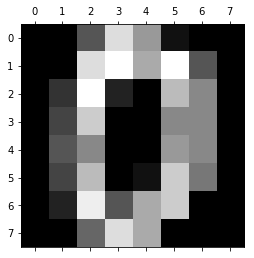

In [54]:
from sklearn import datasets
help(datasets)

# from Python SKlearn.datasets.help()
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
#       (1797, 64)
import matplotlib.pyplot as plt #doctest: +SKIP
plt.gray() #doctest: +SKIP
print(digits.target[0])
plt.matshow(digits.images[0]) #doctest: +SKIP
plt.show() #doctest: +SKIP

Text(0.5,1,'$\\alpha^2 > \\beta_3$')

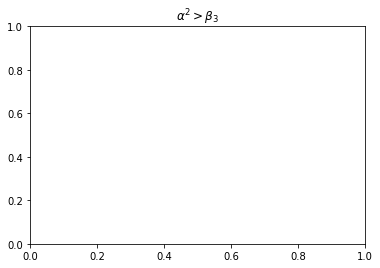

In [51]:
# Python 数据分析实战
# LaTex 编写数字表达式

import matplotlib.pyplot as plt
%matplotlib inline
plt.title(r'$\alpha > \beta$')
plt.title(r'$\alpha_i > \beta_i$')
plt.title(r'$\alpha^2 > \beta_3$')

In [33]:
import nltk
from nltk.tokenize import word_tokenize
print(s, '\n')
print(len(s))

my_text = ','.join(s)

nltk_tokens = word_tokenize(my_text)
print(nltk_tokens)

['Application', 'HardwareEvents', 'Internet', 'Explorer', 'Key', 'Management', 'Service', 'Kingsoft', 'Internet', 'Security', 'Media', 'Center', 'System', 'Windows', 'PowerShell', 'Microsoft-Windows-Application', 'Server-Applications/Admin', 'Microsoft-Windows-BitLocker-DrivePreparationTool/Admin', 'Microsoft-Windows-Dhcp-Client/Admin', 'Microsoft-Windows-DhcpNap/Admin', 'Microsoft-Windows-Dhcpv6-Client/Admin', 'Microsoft-Windows-Diagnosis-Scripted/Admin', 'Microsoft-Windows-Kernel-EventTracing/Admin', 'Microsoft-Windows-MUI/Admin', 'Microsoft-Windows-PrintService/Admin', 'Microsoft-Windows-RemoteApp', 'Desktop', 'Connections/Admin', 'Microsoft-Windows-RemoteAssistance/Admin', 'Microsoft-Windows-RemoteDesktopServices-RdpCoreTS/Admin', 'microsoft-windows-RemoteDesktopServices-RemoteDesktopSessionManager/Admin', 'Microsoft-Windows-TerminalServices-ClientUSBDevices/Admin', 'Microsoft-Windows-TerminalServices-LocalSessionManager/Admin', 'Microsoft-Windows-TerminalServices-PnPDevices/Admin'

In [5]:
help(word_tokenize)

Help on function word_tokenize in module nltk.tokenize:

word_tokenize(text, language='english', preserve_line=False)
    Return a tokenized copy of *text*,
    using NLTK's recommended word tokenizer
    (currently an improved :class:`.TreebankWordTokenizer`
    along with :class:`.PunktSentenceTokenizer`
    for the specified language).
    
    :param text: text to split into words
    :type text: str
    :param language: the model name in the Punkt corpus
    :type language: str
    :param preserve_line: An option to keep the preserve the sentence and not sentence tokenize it.
    :type preserve_line: bool



In [49]:
import os
os.getcwd()

'C:\\Users\\user\\My Works\\文本识别'

In [54]:
?os.getcwd()

In [6]:
# tokenizer.py
# 6.2 用标记解析方法预处理数据  练习
# NLP 自然语言处理
testfile = open("gwdz0305.txt", "rb") # 非utf-8编码文件加 'rb'
text = testfile.read()
testfile.close()
print('test text: ', text)
print('end')
"""
from nltk.tokenize import sent_tokenize
# 对输入文本运行nltk提供的句子解析器,提取标记.
sent_tokenize_list = sent_tokenize(text)

print ("\nSentence tokenizer:") # 打印解析结果列表
print (sent_tokenize_list)

# Create a new word tokenizer # 建立一个新的单词解析器
from nltk.tokenize import word_tokenize # 单词分词

print ("\nWord tokenizer:")
print (word_tokenize(text))
"""

"""
# Create a new WordPunct tokenizer 带标点的单词解析器
# 将标点符号保留到不同的句子中
from nltk.tokenize import WordPunctTokenizer

word_punct_tokenizer = WordPunctTokenizer()
print ("\nWord punct tokenizer:")
print (word_punct_tokenizer.tokenize(text))

# stemmer.py
# 6.3 提取文本数据的词干
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
#定义单词作词干提取
words = ['table', 'probably', 'wolves', 'playing', 'is', 
        'dog', 'the', 'beaches', 'grounded', 'dreamt', 'envision']
# 词干提取表，对比不同的词干提取算法
# Compare different stemmers
stemmers = ['PORTER', 'LANCASTER', 'SNOWBALL']
stemmer_porter = PorterStemmer()
stemmer_lancaster = LancasterStemmer()
stemmer_snowball = SnowballStemmer('english')
# 打印格式
formatted_row = '{:>16}' * (len(stemmers) + 1)
print ('\n', formatted_row.format('WORD', *stemmers), '\n')
# 迭代列表中的单词，用3个提取器提取
for word in words:
    stemmed_words = [stemmer_porter.stem(word), 
            stemmer_lancaster.stem(word), stemmer_snowball.stem(word)]
    print (formatted_row.format(word, *stemmed_words))
"""

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



'\n# Create a new WordPunct tokenizer 带标点的单词解析器\n# 将标点符号保留到不同的句子中\nfrom nltk.tokenize import WordPunctTokenizer\n\nword_punct_tokenizer = WordPunctTokenizer()\nprint ("\nWord punct tokenizer:")\nprint (word_punct_tokenizer.tokenize(text))\n\n# stemmer.py\n# 6.3 提取文本数据的词干\nfrom nltk.stem.porter import PorterStemmer\nfrom nltk.stem.lancaster import LancasterStemmer\nfrom nltk.stem.snowball import SnowballStemmer\n#定义单词作词干提取\nwords = [\'table\', \'probably\', \'wolves\', \'playing\', \'is\', \n        \'dog\', \'the\', \'beaches\', \'grounded\', \'dreamt\', \'envision\']\n# 词干提取表，对比不同的词干提取算法\n# Compare different stemmers\nstemmers = [\'PORTER\', \'LANCASTER\', \'SNOWBALL\']\nstemmer_porter = PorterStemmer()\nstemmer_lancaster = LancasterStemmer()\nstemmer_snowball = SnowballStemmer(\'english\')\n# 打印格式\nformatted_row = \'{:>16}\' * (len(stemmers) + 1)\nprint (\'\n\', formatted_row.format(\'WORD\', *stemmers), \'\n\')\n# 迭代列表中的单词，用3个提取器提取\nfor word in words:\n    stemmed_words = [stemmer_p

In [2]:
# 用文本识别处理Windows 系统日志 2019.3.20
# 1. 先将日志样本用windows事件查看器打开，导出为csv或txt类文件，
# 再读入程序操作
import pandas as pd
chunks = pd.read_csv('20190301_csv.csv',  header=0, iterator = True,  engine='python')
chunk1 = chunks.get_chunk(10) # 分块赋值，否则内存不够。
print(chunk1.columns) # Index(['级别', '日期和时间', '来源', '事件 ID', '任务类别', 'Unnamed: 5'], dtype='object')
# 查看需要计数的列名，
chunk1_5 = chunk1['Unnamed: 5'] # 查看需要操作的列
print(chunk1_5)
print([x for x in chunk1_5])
y = [x for x in chunk1_5]
y

Index(['级别', '日期和时间', '来源', '事件 ID', '任务类别', 'Unnamed: 5'], dtype='object')
0                      Software Protection 服务处于 停止 状态。
1                    Network Connections 服务处于 正在运行 状态。
2                    Software Protection 服务处于 正在运行 状态。
3                         Windows Update 服务处于 正在运行 状态。
4                      Software Protection 服务处于 停止 状态。
5                    Software Protection 服务处于 正在运行 状态。
6                                      客户体验改善计划的用户登录通知
7    Smart Card Device Enumeration Service 服务处于 正在运...
8                  WMI Performance Adapter 服务处于 停止 状态。
9    Microsoft Software Shadow Copy Provider 服务处于 停...
Name: Unnamed: 5, dtype: object
['Software Protection 服务处于 停止 状态。', 'Network Connections 服务处于 正在运行 状态。', 'Software Protection 服务处于 正在运行 状态。', 'Windows Update 服务处于 正在运行 状态。', 'Software Protection 服务处于 停止 状态。', 'Software Protection 服务处于 正在运行 状态。', '客户体验改善计划的用户登录通知', 'Smart Card Device Enumeration Service 服务处于 正在运行 状态。', 'WMI Performance Adapter 服务处于 停止 状态。', 'Microsoft Soft

['Software Protection 服务处于 停止 状态。',
 'Network Connections 服务处于 正在运行 状态。',
 'Software Protection 服务处于 正在运行 状态。',
 'Windows Update 服务处于 正在运行 状态。',
 'Software Protection 服务处于 停止 状态。',
 'Software Protection 服务处于 正在运行 状态。',
 '客户体验改善计划的用户登录通知',
 'Smart Card Device Enumeration Service 服务处于 正在运行 状态。',
 'WMI Performance Adapter 服务处于 停止 状态。',
 'Microsoft Software Shadow Copy Provider 服务处于 停止 状态。']

In [1]:
# 2. 对列计数
import pandas as pd
chunks = pd.read_csv('20190301_csv.csv',  header=0, iterator = True, engine='python')
chunk1 = chunks.get_chunk(1100000)
print('事件日志记录数 : ', len(chunk1))
print(chunk1.columns)
# DataFrame的计数函数
count = pd.DataFrame(pd.value_counts(chunk1['Unnamed: 5'].values,  sort=1)) # sort=1降序排列

print("不同内容日志个数 ：", len(count))
print("按照出现次数排序 : ")
count
# count.to_excel("GuoWei_01.xls", encoding="utf-8") # to_csv 用excel打开乱码，
# 用NotePad打开不乱码但只显示3300条记录


事件日志记录数 :  102216
Index(['级别', '日期和时间', '来源', '事件 ID', '任务类别', 'Unnamed: 5'], dtype='object')
不同内容日志个数 ： 2558
按照出现次数排序 : 


,0
WinHTTP Web Proxy Auto-Discovery Service 服务处于 正在运行 状态。,12636
WinHTTP Web Proxy Auto-Discovery Service 服务处于 停止 状态。,12569
WMI Performance Adapter 服务处于 停止 状态。,10284
WMI Performance Adapter 服务处于 正在运行 状态。,10284
LiveUpdate 服务处于 正在运行 状态。,6630
LiveUpdate 服务处于 停止 状态。,6629
Volume Shadow Copy 服务处于 停止 状态。,3491
Volume Shadow Copy 服务处于 正在运行 状态。,3491
Microsoft Software Shadow Copy Provider 服务处于 正在运行 状态。,3357
Microsoft Software Shadow Copy Provider 服务处于 停止 状态。,3357


### 换另一个文件处理

In [2]:
# 3. 换另一个文件处理
import pandas as pd
import numpy as np
from pandas import Series
chunks = pd.read_csv('eventtest\\20190301.txt', encoding='utf-8', sep='\t', header=0,  iterator = True, engine='python') # index_col=1,
# 先是乱码，加utf-8后不乱码，utf-8 必须紧跟文件名后，其它位置出错。
# 但是分割符是"\t",加sep='\t' 
# 没有engine='python' 显示一段系统说明。
# 指定iterator=True 也可以返回一个可迭代对象TextFileReader ，读大数据文件用：
# 例： reader = pd.read_table('tmp.sv', sep='|', iterator=True)
chunk1 = chunks.get_chunk(1000000) 
print('事件日志记录数 : ', len(chunk1))
print(chunk1.columns) # 显示需要计数的列名
count = pd.DataFrame(pd.value_counts(chunk1['级别'].values,  sort=1)) # sort=1降序排列
print("不同内容日志个数 ：", len(count))
print("按照出现次数排序 : ")
count.to_excel("GuoWei_02.xls", encoding="utf-8") # 保存为excel 文件
count

事件日志记录数 :  102165
Index(['级别'], dtype='object')
不同内容日志个数 ： 2558
按照出现次数排序 : 


,0
WinHTTP Web Proxy Auto-Discovery Service 服务处于 正在运行 状态。,12636
WinHTTP Web Proxy Auto-Discovery Service 服务处于 停止 状态。,12569
WMI Performance Adapter 服务处于 停止 状态。,10284
WMI Performance Adapter 服务处于 正在运行 状态。,10284
LiveUpdate 服务处于 正在运行 状态。,6630
LiveUpdate 服务处于 停止 状态。,6629
Volume Shadow Copy 服务处于 正在运行 状态。,3491
Volume Shadow Copy 服务处于 停止 状态。,3491
Microsoft Software Shadow Copy Provider 服务处于 停止 状态。,3357
Microsoft Software Shadow Copy Provider 服务处于 正在运行 状态。,3357


import pandas as pd

chunks = pd.read_csv('20190301_csv.csv',  header=[ index_col=5, iterator = True, engine='python')
chunk1 = chunks.get_chunk(1000)
chunk1

In [104]:
#排除词库
excludes = ['the','and','to','of','i','a','in','it','that','is',
            'you','my','with','not','his','this','but','for',
            'me','s','he','be','as','so','him','your']
def getText():    
    txt=open('aol01.txt','rb').read()    
    txt=txt.lower()    
    for ch in "~@#$%^&*()_-+=<>?/,.:;{}[]|\'""":    
        txt=txt.replace(ch,' ')       
    return txt    

hamletTxt=getText()    
words=hamletTxt.split()    
counts={}    
sumcount = 0  
for word in words:    
    counts[word]=counts.get(word,0)+1  
    sumcount = sumcount + 1 

counts_ex = counts.copy()    
for key in counts.keys():
    if key in excludes:
        counts_ex.pop(key)
items=list(counts_ex.items())    
items.sort(key=lambda x:x[1],reverse=True)    
for i in range(10):    
    word,count=items[i]    
    print('{0:<10}{1:>5}'.format(word,count))    

 #将统计结果写入文本文件中    
outfile = open('词频统计结果.txt', "w")    
lines = []      
lines.append('单词种类：'+str(len(items))+'\n')    
lines.append('单词总数：'+str(sumcount)+'\n')    
lines.append('词频排序如下:\n')    
lines.append('word\tcounts\n')    

s= ''    
for i in range(len(items)):    
    s = '\t'.join([str(items[i][0]), str(items[i][1])])    
    s += '\n'      
    lines.append(s)    
print('\n统计完成！\n')    
outfile.writelines(lines)    
outfile.close()


TypeError: a bytes-like object is required, not 'str'

# 处理Windows 系统日志文件

In [ ]:
# 用文本识别处理Windows 系统日志 - 2  2019.3.23
# 先将日志样本用windows事件查看器打开，导出为csv或txt类文件，
# 再读入程序操作
# 查找步骤：
# 读入日志文件，指定关键字，查找含有关键字的记录，按照关键字存储文件。

import pandas as pd
chunks = pd.read_csv('20190301_csv.csv',  header=0, iterator = True,  engine='python')
chunk1 = chunks.get_chunk(110000) # 分块赋值，否则内存不够。
#print(chunk1.columns) # Index(['级别', '日期和时间', '来源', '事件 ID', '任务类别', 'Unnamed: 5'], dtype='object')

df = pd.DataFrame(chunk1)
df_error = df[df['级别'].isin(['错误'])]
df_warn = df[df['级别'].isin(['警告'])]
print(df_error)
print(df_warn)

count = pd.DataFrame(pd.value_counts(chunk1['级别'].values,  sort=1)) # sort=1降序排列
# 所有级别降序列表
# count  # 错误 501   警告 343

# 存储文件
df_error.to_excel("GuoWei_01_error.xls", encoding="utf-8") # 保存为excel 文件
df_warn.to_excel("GuoWei_01_warn.xls", encoding="utf-8")

In [6]:
# 只针对日志导出“错误”的记录，事先已经将记录按照“错误”筛选出来了。
# Windows事件查看器导出日志时按照详细，错误/警告，WDI 经典筛选，保存为CSV格式文件。
# 只是Excel表格的显示内容里面有分行符，内容多的行过高。可能是 \t。
# 用文本识别处理Windows 系统日志 - 2  2019.3.23
# 1. 先将日志样本用windows事件查看器打开，导出为csv或txt类文件，
# 再读入程序操作
# 查找步骤：
# 读入日志文件，指定关键字，查找含有关键字的记录，按照关键字存储文件。

import pandas as pd
chunks = pd.read_csv('20190305_error_6.csv',  header=0, iterator = True,  engine='python')
chunk1 = chunks.get_chunk(110000) # 分块赋值，否则内存不够。
#print(chunk1.columns) # Index(['级别', '日期和时间', '来源', '事件 ID', '任务类别', 'Unnamed: 5'], dtype='object')

df = pd.DataFrame(chunk1)
df_error = df[df['级别'].isin(['错误'])]
# df_warn = df[df['级别'].isin(['警告'])]
print(df_error)
# print(df_warn)

count = pd.DataFrame(pd.value_counts(chunk1['级别'].values,  sort=1)) # sort=1降序排列
# 所有级别降序列表
# count  # 错误 501   警告 343

# 存储文件
df_error.to_excel("GuoWei_02_error.xls", encoding="utf-8") # 保存为excel 文件
# df_warn.to_excel("GuoWei_02_warn.xls", encoding="utf-8")

     级别             日期和时间                                来源  事件 ID 任务类别  \
0    错误    2019/3/2 15:49           Service Control Manager   7032    无   
1    错误    2019/3/2 15:47           Service Control Manager   7031    无   
2    错误    2019/3/2 15:47           Service Control Manager   7031    无   
3    错误    2019/3/2 15:47           Service Control Manager   7031    无   
4    错误    2019/3/2 15:47           Service Control Manager   7031    无   
5    错误    2019/3/2 15:47           Service Control Manager   7031    无   
6    错误    2019/3/2 15:47           Service Control Manager   7031    无   
7    错误    2019/2/15 0:24           Service Control Manager   7032    无   
8    错误    2019/2/15 0:22           Service Control Manager   7031    无   
9    错误    2019/2/15 0:22           Service Control Manager   7031    无   
10   错误    2019/2/15 0:22           Service Control Manager   7031    无   
11   错误    2019/2/15 0:22           Service Control Manager   7031    无   
12   错误    2019/2/15 0:22

In [5]:
# 只针对日志导出“警告”的记录，事先已经将记录按照“警告”筛选出来了。
# 用文本识别处理Windows 系统日志 - 2  2019.3.23
# 1. 先将日志样本用windows事件查看器打开，导出为csv或txt类文件，
# 再读入程序操作
# 查找步骤：
#读入日志文件，指定关键字，查找含有关键字的记录，按照关键字存储文件。

import pandas as pd
chunks = pd.read_csv('20190305_warn_2.csv',  header=0, iterator = True,  engine='python')
chunk1 = chunks.get_chunk(110000) # 分块赋值，否则内存不够。
#print(chunk1.columns) # Index(['级别', '日期和时间', '来源', '事件 ID', '任务类别', 'Unnamed: 5'], dtype='object')

df = pd.DataFrame(chunk1)
# df_error = df[df['级别'].isin(['错误'])]
df_warn = df[df['级别'].isin(['警告'])]
# print(df_error)
print(df_warn)

count = pd.DataFrame(pd.value_counts(chunk1['级别'].values,  sort=1)) # sort=1降序排列
# 所有级别降序列表
# count  # 错误 501   警告 343

# 存储文件
# df_error.to_excel("GuoWei_02_error.xls", encoding="utf-8") # 保存为excel 文件
df_warn.to_excel("GuoWei_02_warn.xls", encoding="utf-8")


     级别             日期和时间                       来源  事件 ID 任务类别  \
0    警告    2019/2/26 9:05                   LsaSrv   6038    无   
1    警告    2019/2/18 8:59                      AFD  16001    无   
2    警告    2019/2/18 8:56  Microsoft-Windows-WinRM  10149    无   
3    警告    2019/2/12 9:27                      AFD  16001    无   
4    警告   2019/1/21 18:19                   LsaSrv   6038    无   
5    警告  2018/12/30 11:00                      AFD  16001    无   
6    警告  2018/12/30 10:28                      AFD  16001    无   
7    警告  2018/12/14 10:11                   LsaSrv   6038    无   
8    警告  2018/11/22 14:29                     disk    153    无   
9    警告  2018/11/22 14:29                     disk    153    无   
10   警告  2018/11/22 14:29                     disk    153    无   
11   警告  2018/11/22 14:29                     disk    153    无   
12   警告  2018/11/22 14:29                     disk    153    无   
13   警告  2018/11/22 14:29                     disk    153    无   
14   警告  2

In [29]:
# 只针对日志导出“警告”的记录，事先已经将记录按照“警告”筛选出来了。增加了选择“错误”类别。
# 用文本识别处理Windows 系统日志 - 2  2019.3.23
# 1. 先将日志样本用windows事件查看器打开，导出为csv或txt类文件，
# 再读入程序操作
# 查找步骤：
#读入日志文件，指定关键字，查找含有关键字的记录，按照关键字存储文件。

import pandas as pd
chunks = pd.read_csv('20190305_sum_1.csv',  header=0, iterator = True,  engine='python')
chunk1 = chunks.get_chunk(110000) # 分块赋值，否则内存不够。
# print(chunk1.columns) # Index(['级别', '日期和时间', '来源', '事件 ID', '任务类别', 'Unnamed: 5'], dtype='object')

# print(chunk1)
# df =pd.DataFrame(chunk1)
# print(df)

df = pd.DataFrame(chunk1)
df_error = df[df['级别'].isin(['错误'])]
df_warn = df[df['级别'].isin(['警告'])]
# print(df_error)
# print(df_warn)

# count = pd.DataFrame(pd.value_counts(chunk1['级别'].values,  sort=1)) # sort=1降序排列
# 所有级别降序列表
# count  # 错误 501   警告 343

# 存储文件 20190326
import os
path_error = 'd:/events/error'
path_warn = 'd:/events/warn'
# 判断保存文件的目录是否存在，否则建立目录。
def exist(path):
    """
    paramater is path.  
    """
    if os.path.exists(path) == False:
        if '.' not in path:
            os.makedirs(path)
            print(path + '  is made.')
# 按照不同的日志分类调用函数： 
exist(path_error)
exist(path_warn)

# 命名文件
import time
daytime = time.strftime('%Y%m%d-%H%M%S',time.localtime(time.time()))
file = path_error +'/'+ "GuoWei_02_all_error"+daytime+".xls"
# 文件名字：国微_系统号_ 全部_错误日期时间.xls
df_error.to_excel(file, encoding="utf-8") # 保存为excel 文件
print(file + ' is sved.')
file = path_warn+'/'+ "GuoWei_02_all_warn"+daytime+".xls"
df_warn.to_excel(file, encoding="utf-8") # 保存为excel 文件
print(file + ' is sved.')

# 打开Excel表格观察添加注释后保存2种类型文件，xls和csc类。以便下一步继续统计。

d:/events/error/GuoWei_02_all_error20190326-225343.xls is sved.
d:/events/warn/GuoWei_02_all_warn20190326-225343.xls is sved.


In [24]:
import sys
import pandas as pd
input_file = sys.argv[1] 

chunks = pd.read_csv(input_file,  header=0, iterator = True,  engine='python')
chunk1 = chunks.get_chunk(1100) 
chunk1


d:/events/error/GuoWei_02_all_error20190326-213602.xls is sved.
d:/events/warn/GuoWei_02_all_warn20190326-213602.xls is sved.


In [22]:
def savefile(clas):   
    filename = 'd:/events/'+ "GuoWei_02_all_"+clas+daytime+".xls"
    file = "df_" + clas
    print(file)
    file.to_excel(filename, encoding="utf-8")
    
clas = "error"    
savefile(clas)
clas = "warn"
savefile(clas)
# 造不出变量的变量！


df_error


AttributeError: 'str' object has no attribute 'to_excel'

In [55]:
?exist()

In [30]:
# 2. 对列计数
import pandas as pd
chunks = pd.read_csv('GuoWei_02_sum_warn.csv',  header=0, iterator = True, engine='python')
# 读取xls格式出错，需要由xls格式转换成CSV格式后操作。
chunk1 = chunks.get_chunk(1100000)
print('事件日志记录数 : ', len(chunk1))
print(chunk1.columns)
# DataFrame的计数函数
count = pd.DataFrame(pd.value_counts(chunk1['事件 ID'].values,  sort=1)) # sort=1降序排列

print("不同内容日志个数 ：", len(count))
print("按照出现次数排序 : ")
count
# count.to_excel("GuoWei_01.xls", encoding="utf-8") # to_csv 用excel打开乱码，
# 用NotePad打开不乱码但只显示3300条记录


事件日志记录数 :  280
Index(['记录序号', '级别', '日期和时间', '来源', '事件 ID', '任务类别', 'Unnamed: 5',
       'Unnamed: 7', '系统名称', 'Unnamed: 9', '2017/4/7 16:12', '至',
       '2019/3/2 15:49', '280', '条错误', '制表单位', 'Unnamed: 16', '责任人',
       'Unnamed: 18', '制表日期'],
      dtype='object')
不同内容日志个数 ： 8
按照出现次数排序 : 


,0
153,148
16001,51
6038,39
4227,21
10149,12
1076,6
129,2
1077,1


In [19]:
# 数组定位练习
import pandas as pd
filename = ''
chunks = pd.read_csv('20190305_sum_1.csv',  header=0, iterator = True,  engine='python')
chunk1 = chunks.get_chunk(110000) # 分块赋值，否则内存不够。
print(chunk1.columns) # Index(['级别', '日期和时间', '来源', '事件 ID', '任务类别', 'Unnamed: 5'], dtype='object')

# print(chunk1)
# df =pd.DataFrame(chunk1)
# print(df)

df = pd.DataFrame(chunk1)
# df_error = df[df['级别'].isin(['错误'])] # 提取所有满足条件的记录
# df_warn = df[df['级别'].isin(['警告'])]
df_error = df['级别'] == '错误' # 定位所有‘级别’ 栏=错误的记录
print(df_error.shape)
# print( df.loc[df_error,  'Unnamed: 5']) # 打印上面定位的记录的一列 <- 满足条件的定位。

# print(df_warn)

count = pd.DataFrame(pd.value_counts(chunk1['级别'].values,  sort=1)) # sort=1降序排列
# 对级别列内的不同内容计数，并排列。
# count = pd.DataFrame(pd.value_counts(df_error.values,  sort=1)) # sort=1降序排列
print(count)
# 所有级别降序列表
# count  # 错误 501   警告 343

# 存储文件
# df_error.to_excel("GuoWei_02_sum_error.xls", encoding="utf-8") # 保存为excel 文件
# df_warn.to_excel("GuoWei_02_sum_warn.xls", encoding="utf-8")

# 打开Excel表格观察，添加注释后保存2种类型文件，xls和csc类。以便下一步继续统计。



Index(['级别', '日期和时间', '来源', '事件 ID', '任务类别', 'Unnamed: 5'], dtype='object')
(98017,)
        0
信息  97414
错误    323
警告    280


In [8]:
import os
path_error = 'd:/events/error'
path_warn = 'd:/events/warn'
number = '01'
file = 'system' + number
os.path.exists(path_error)
print(os.path.exists(path_error + file))

os.path.isfile(file)
os.path.isfile(path_error + file)

if os.path.exists(path_error + file) != False:
    os.makedirs(path_error)
os.path.exists(path_error)


try:
    f =open(file)
    f.close()
except IOError:
    print("File is not accessible.")

False
File is not accessible.


In [41]:
"""
把程序代码做成可供调用的函数
函数的帮助说明放在def 行下的第一行，用说明符号“”“ ”“”括起来。
"""
#wave.py

import sys
from Tkinter import *
from math import *

class wave :
    def __init__ (self, points=400, formula=None):
        self.data = [0.0]*points
        self.points = points
        if formula:
            for p in range(points):
                x = p*pi*2/points
                self.data[p] = eval(formula)
                
    def __add__ (self, other):
        target = wave(points=self.points)
        for i in range(self.points):
            target.data[i] = self.data[i] + other.data[i]
        return target

    def __mul__ (self, other):
        target = wave(points=self.points)
        if type(other) == type(5) or type(other) == type(5.0):
            for i in range(self.points):
                target.data[i] = self.data[i] * other
        else:
            for i in range(self.points):
                target.data[i] = self.data[i] * other.data[i]
            return target

    def __sub__ (self, other):
        target = wave(points=self.points)
        for i in range(self.points):
            target.data[i] = self.data[i] - other.data[i]
        return target

    def integral(self):
        ans = 0.0
        for pt in self.data :
            ans = ans + pt
        return ans*2*pi/self.points

    def plot(self, title="??", pixHeight=None, maxY=None, others=[]):
        if not pixHeight :
            pixHeight = self.points*2/3 #pleaseant ratio
        pixWidth = self.points # find max and min data to scale
        if not maxY:
            maxY = max(max(self.data), -min(self.data))
        offset = pixHeight/2
        scale = offset/maxY

        win = Tk()
        win.title(title)
        canvas = Canvas(win, width=pixWidth, height=pixHeight)
        #create zero line
        canvas.create_line(0, offset, pixWidth, offset)
        canvas.pack()

        self.plotOne(canvas, pixWidth, scale, offset)
        for i in range(len(others)):
            others[i].plotOne(canvas, pixWidth, scale, offset)
        if sys.platform == "win32" :
            win.mainloop()

    def plotOne(self, canvas, pixWidth, scale, offset):
        for x in range(pixWidth):
            y = offset - self.data[x] * scale
            if x :
                canvas.create_line(x-1, yprev, x,y)
            yprev = y

    def fft(self):
        work = self * 1 #Harmonics will be stripped from this
        for harm in range(1, 10):
            formula = "-sin(%d*x)" % harm
            area = (wave(formula=formula)*work).integral()
            amplitude = area / -pi
            if amplitude > .000001:
                print "Haemonic=", harm, "Amplitude=%.04f" % amplitude
            takeAway = wave(formula="sin(%d*x) * %f" % (harm, amplitude))
            work = work - takeAway

    def test():
        """
        practice main()
        """
        p1 = wave(formula="sin(x)/1")
        p3 = wave(formula="sin(3*x)/3")
        p5 = wave(formula="sin(5*x)/5")
        mys = p1+p3+p5
        mys = fft()

    if __name__ == "__main__":
        test()
    
        

    
        


SyntaxError: Missing parentheses in call to 'print'. Did you mean print(print "Haemonic=", harm, "Amplitude=%.04f" % amplitude)? (<ipython-input-41-e5309c3515ca>, line 84)

In [32]:
# 获取文件的类型 pip install filetype
import filetype
  
def main():
    """
    Where is module filetype? 
    """
    kind = filetype.guess('tests/fixtures/sample.jpg')
    if kind is None:
        print('Cannot guess file type!')
        return
    print('File extension: %s' % kind.extension)
    print('File MIME type: %s' % kind.mime)
    if __name__ == '__main__':
        main()

ModuleNotFoundError: No module named 'filetype'

In [44]:
def test(x):
    """
    test for practice!
    20190326
    """
    print(x+'!')
y = '12'
test(y)


12!


In [48]:
#test()